In [2]:
import csv
import pandas as pd
from IPython.display import display

from GeoBases import GeoBase

bookings = '/home/axel/Documents/bookings.csv'
searches = '/home/axel/Documents/searches.csv'

n = sum(1 for line in open(bookings))
print n

m = sum(1 for line in open(searches))
print m

10000011
20390199


In [25]:
bookings_pd = pd.read_csv(bookings, sep='^', nrows=10)
display(bookings_pd.head())

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [3]:
pass_by_ports = pd.DataFrame(columns=['arr_port', 'nb_pass'])
print pass_by_ports
fields = ['arr_port', 'pax']
data = pd.read_csv(bookings, delimiter="^", usecols=fields )
airports = pd.unique(data['arr_port'])
print airports

Empty DataFrame
Columns: [arr_port, nb_pass]
Index: []
['LHR     ' 'CLT     ' 'SVO     ' ..., 'VEL     ' 'SLM     ' 'SG      ']


In [4]:
for airport in airports :
    psgrs = data.pax[data.arr_port == airport].sum(axis=0)
    pass_by_ports = pass_by_ports.append({'arr_port':airport, 'nb_pass':psgrs}, ignore_index=True)
print pass_by_ports

      arr_port  nb_pass
0     LHR       88809.0
1     CLT       16862.0
2     SVO       21292.0
3     LGA       40712.0
4     SIN       24874.0
5     TUS        4090.0
6     CTA        7300.0
7     YWG        2680.0
8     PVG       26630.0
9     SGC         310.0
10    ALG       10610.0
11    DMM        7100.0
12    LED       15960.0
13    LIS       25050.0
14    BLR       13490.0
15    BWI       13590.0
16    DEL       35680.0
17    TPA       21530.0
18    MNL       32400.0
19    ULN         990.0
20    ZRH       20190.0
21    ALA        4580.0
22    FCO       45120.0
23    AYT        5170.0
24    MVD        2430.0
25    CVG        6390.0
26    OTP        7900.0
27    CDG       64490.0
28    HAV        6910.0
29    NRT       16570.0
...        ...      ...
2245  AZN          40.0
2246  AXA          10.0
2247  KMS          20.0
2248  BAY          40.0
2249  LPP          30.0
2250  HOF          20.0
2251  SLI          20.0
2252  MCE           0.0
2253  JSI         -10.0
2254  DWD       

In [8]:
pass_by_ports = pass_by_ports.sort_values('nb_pass', ascending=False)
pass_by_ports = pass_by_ports.drop_duplicates()

print pass_by_ports[0:10]
#Question 2

     arr_port  nb_pass
0    LHR       88809.0
58   MCO       70930.0
65   LAX       70530.0
44   LAS       69630.0
150  JFK       66270.0
27   CDG       64490.0
30   BKK       59460.0
70   MIA       58150.0
34   SFO       58000.0
102  DXB       55590.0


In [28]:
geo_a = GeoBase(data='airports', verbose=False)
for i in range(0,10):
    print geo_a.get(pass_by_ports['arr_port'][i].strip(), 'name')

London Heathrow Airport
Charlotte/Douglas International Airport
Aeroport Sheremet'yevo
La Guardia Airport
Singapore Changi Airport
Tucson International Airport
Aeroporto di Catania-Fontanarossa
Winnipeg Int. Airportman.
Shanghai / Pudong
Surgut


In [3]:
fields = ['Date', 'Destination']
data = pd.read_csv(searches, delimiter="^", usecols=fields)
print data.head()

         Date Destination
0  2013-01-01         AUH
1  2013-01-01         MIL
2  2013-01-01         SFO
3  2013-01-01         ARN
4  2013-01-01         MAD


In [10]:
new_data = data.ix[(data['Destination']=='AGP') | (data['Destination'] == 'MAD') | (data['Destination'] == 'BCN')]
print new_data

                Date Destination
4         2013-01-01         MAD
93        2013-01-01         AGP
113       2013-01-01         BCN
147       2013-01-01         AGP
151       2013-01-01         MAD
165       2013-01-01         BCN
177       2013-01-01         BCN
186       2013-01-01         BCN
188       2013-01-01         BCN
208       2013-01-01         BCN
229       2013-01-01         BCN
242       2013-01-01         AGP
253       2013-01-01         BCN
322       2013-01-01         BCN
365       2013-01-01         BCN
375       2013-01-01         MAD
406       2013-01-01         MAD
458       2013-01-01         AGP
481       2013-01-01         BCN
500       2013-01-01         BCN
509       2013-01-01         MAD
541       2013-01-01         BCN
593       2013-01-01         BCN
606       2013-01-01         MAD
618       2013-01-01         BCN
623       2013-01-01         BCN
628       2013-01-01         BCN
633       2013-01-01         BCN
641       2013-01-01         BCN
674       

In [11]:
time_data = pd.concat([new_data.drop('Date', axis = 1), (new_data.Date.str.split("-|T").str[:3].apply(pd.Series).rename(columns={0:'year', 1:'month', 2:'day'}))], axis = 1)
print time_data

         Destination  year month day
4                MAD  2013    01  01
93               AGP  2013    01  01
113              BCN  2013    01  01
147              AGP  2013    01  01
151              MAD  2013    01  01
165              BCN  2013    01  01
177              BCN  2013    01  01
186              BCN  2013    01  01
188              BCN  2013    01  01
208              BCN  2013    01  01
229              BCN  2013    01  01
242              AGP  2013    01  01
253              BCN  2013    01  01
322              BCN  2013    01  01
365              BCN  2013    01  01
375              MAD  2013    01  01
406              MAD  2013    01  01
458              AGP  2013    01  01
481              BCN  2013    01  01
500              BCN  2013    01  01
509              MAD  2013    01  01
541              BCN  2013    01  01
593              BCN  2013    01  01
606              MAD  2013    01  01
618              BCN  2013    01  01
623              BCN  2013    01  01
6

In [12]:
final_data = pd.DataFrame(columns=['Destination','Month','Searches'])

destinations = pd.unique(new_data['Destination'])
print destinations
months = ['01', '02','03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
for destination in destinations :
    for mois in months :
        srchs = time_data.Destination[(time_data.Destination == destination) & (time_data.month == mois)].count()
        final_data = final_data.append({'Destination':destination,'Month':mois,'Searches':srchs},ignore_index=True)
        
print final_data


['MAD' 'AGP' 'BCN']
   Destination Month Searches
0          MAD    01    24258
1          MAD    02    22800
2          MAD    03    24681
3          MAD    04    25251
4          MAD    05    26334
5          MAD    06    22800
6          MAD    07    22971
7          MAD    08    21831
8          MAD    09    21147
9          MAD    10    22294
10         MAD    11    20272
11         MAD    12    14504
12         AGP    01     9633
13         AGP    02     8379
14         AGP    03    10659
15         AGP    04     8265
16         AGP    05    10830
17         AGP    06     7923
18         AGP    07     8892
19         AGP    08     7866
20         AGP    09     8151
21         AGP    10     6499
22         AGP    11     6384
23         AGP    12     3696
24         BCN    01    29469
25         BCN    02    28329
26         BCN    03    30552
27         BCN    04    31236
28         BCN    05    28728
29         BCN    06    26505
30         BCN    07    29241
31         BCN    08

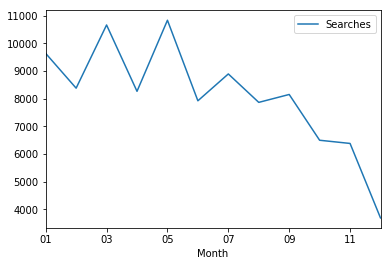

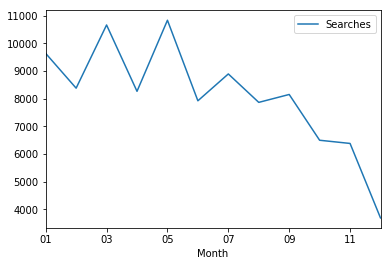

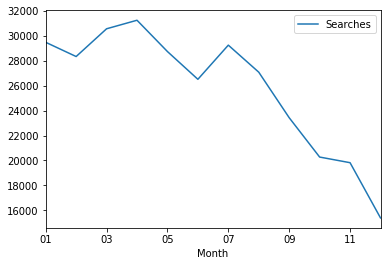

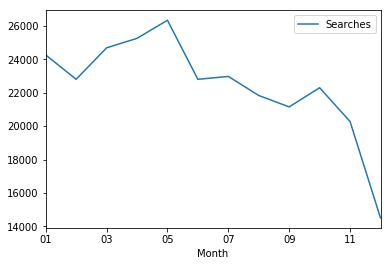

In [28]:
%matplotlib inline
figure = final_data.groupby(['Destination']).plot.line(x= 'Month' , y= 'Searches', )